Dataset Overview:

Total Rows: 9240
Total Columns: 
37
Target Variable: Converted (1 = converted, 0 = not convert
ed)
Several columns contain missing values, and categorical columns have a "Select" value that needs cleaning.

In [2]:
# Step 1 - Data Cleaning

**Step 1: Data Cleaning:**

Remove or impute missing values.
Replace "Select" values in categorical colu
m**n
Broke cleaning into sub-steps for clarit** 
y:
Step 1.1: Replace 'Select' and check missing values.
Step 1.2: Drop columns with more than 50% missing values.
Step 1.3: Impute missing values for numerical and categorical columns.
Step 1.4: Remove duplicate rows.s.

In [4]:
import os
print(os.path.exists('Leads.csv'))

True


In [6]:
# Step 1: Data Cleaning for Lead Scoring Model

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Leads.csv')
print("Initial Data Shape:", df.shape)

Initial Data Shape: (9240, 37)


In [8]:
# Step 1.1: Replace 'Select' with NaN and inspect missing values
df.replace('Select', np.nan, inplace=True)
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentages (Top 10):")
print(missing_percent.sort_values(ascending=False).head(10))


Missing Value Percentages (Top 10):
How did you hear about X Education    78.463203
Lead Profile                          74.188312
Lead Quality                          51.590909
Asymmetrique Profile Score            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
City                                  39.707792
Specialization                        36.580087
Tags                                  36.287879
dtype: float64


In [10]:
# Step 1.2: Drop columns with >50% missing values
cols_to_drop = missing_percent[missing_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with >50% missing values: {list(cols_to_drop)}")
print("Data Shape After Dropping Columns:", df.shape)


Dropped columns with >50% missing values: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile']
Data Shape After Dropping Columns: (9240, 34)


In [12]:
# Step 1.3: Handle remaining missing values
print("\nStep 1.3: Handling remaining missing values")
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Imputing numerical columns with median")
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df.loc[:, col] = df[col].fillna(median_val)
        print(f"Imputed {col} with median: {median_val}")

print("\nImputing categorical columns with mode")
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df.loc[:, col] = df[col].fillna(mode_val)
        print(f"Imputed {col} with mode: {mode_val}")

print("\nRemaining Missing Values:", df.isnull().sum().sum())



Step 1.3: Handling remaining missing values
Imputing numerical columns with median
Imputed TotalVisits with median: 3.0
Imputed Page Views Per Visit with median: 2.0
Imputed Asymmetrique Activity Score with median: 14.0
Imputed Asymmetrique Profile Score with median: 16.0

Imputing categorical columns with mode
Imputed Lead Source with mode: Google
Imputed Last Activity with mode: Email Opened
Imputed Country with mode: India
Imputed Specialization with mode: Finance Management
Imputed What is your current occupation with mode: Unemployed
Imputed What matters most to you in choosing a course with mode: Better Career Prospects
Imputed Tags with mode: Will revert after reading the email
Imputed City with mode: Mumbai
Imputed Asymmetrique Activity Index with mode: 02.Medium
Imputed Asymmetrique Profile Index with mode: 02.Medium

Remaining Missing Values: 0


In [14]:
# Step 1.4: Check and remove duplicate rows
print("\nStep 1.4: Checking for duplicate rows")
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed")

print("\nFinal Data Shape After Cleaning:", df.shape)



Step 1.4: Checking for duplicate rows
Number of Duplicate Rows: 0

Final Data Shape After Cleaning: (9240, 34)


In [16]:
# Save cleaned dataset
print("Saving the cleaned dataset to 'Leads_Cleaned.csv'")
df.to_csv('Leads_Cleaned.csv', index=False)
print("Step 1 Completed: Data Cleaning Finished\n")

Saving the cleaned dataset to 'Leads_Cleaned.csv'
Step 1 Completed: Data Cleaning Finished



In [38]:
# Step 2: Exploratory Data Analysis (EDA)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


Step 2: Exploratory Data Analysis

Step 2.1: Visualizing Target Variable - 'Converted'


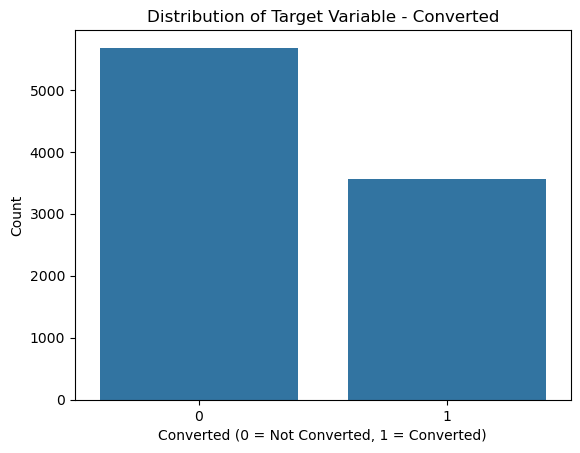

In [22]:
# Step 2: Exploratory Data Analysis (EDA)
print("Step 2: Exploratory Data Analysis")

# 2.1: Target Variable Analysis
print("\nStep 2.1: Visualizing Target Variable - 'Converted'")
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Target Variable - Converted')
plt.xlabel('Converted (0 = Not Converted, 1 = Converted)')
plt.ylabel('Count')
plt.show()


Step 2.2: Correlation Heatmap for Numerical Features


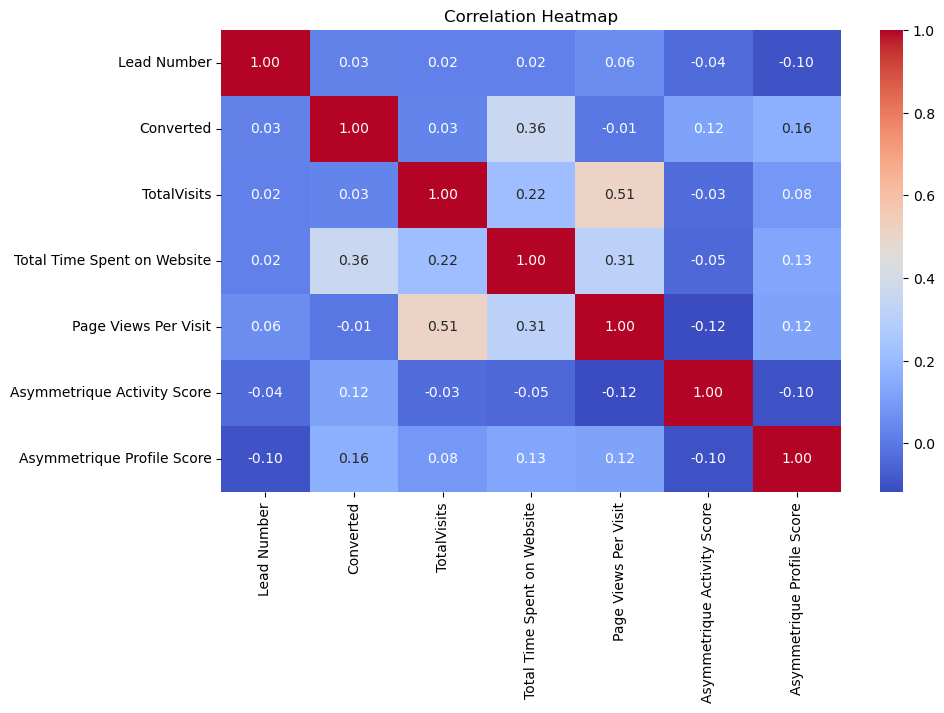

In [24]:
# 2.2: Correlation Analysis for Numerical Features
print("\nStep 2.2: Correlation Heatmap for Numerical Features")

# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number])

# Check if numerical columns exist
if num_cols.shape[1] > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")



Step 2.3: Boxplots for Numerical Features


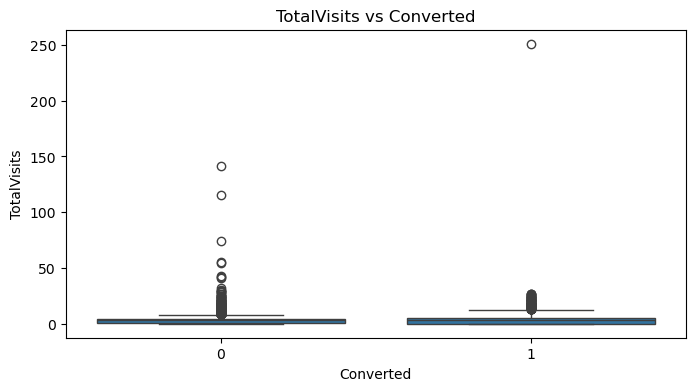


Analysis for TotalVisits: Boxplot displayed



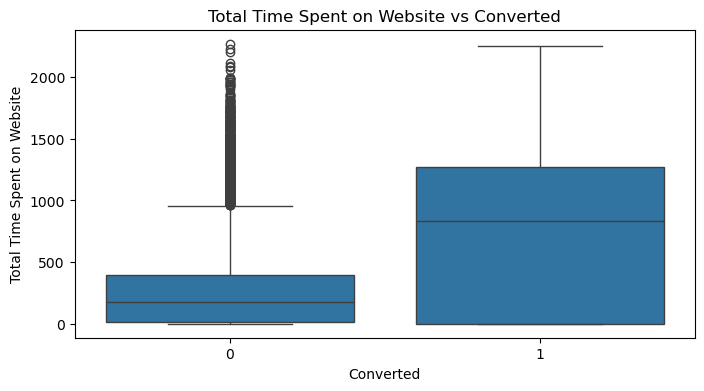


Analysis for Total Time Spent on Website: Boxplot displayed



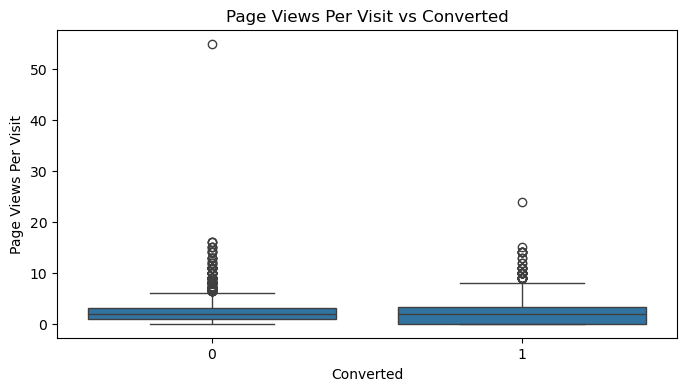


Analysis for Page Views Per Visit: Boxplot displayed



In [26]:

# 2.3: Analyzing Key Numerical Features
print("\nStep 2.3: Boxplots for Numerical Features")
num_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Converted', y=feature, data=df)
    plt.title(f'{feature} vs Converted')
    plt.show()
    print(f"\nAnalysis for {feature}: Boxplot displayed\n")


Step 2.4: Countplots for Categorical Features


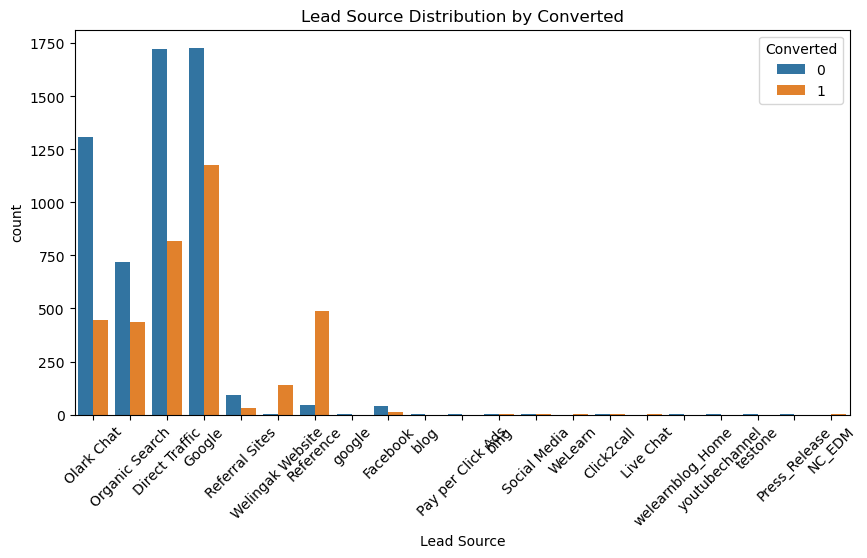


Analysis for Lead Source: Countplot displayed



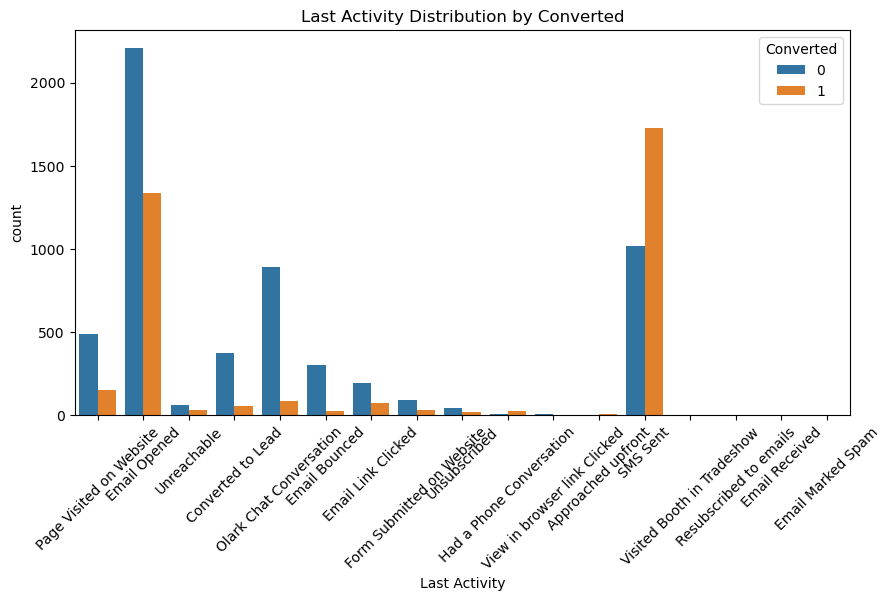


Analysis for Last Activity: Countplot displayed



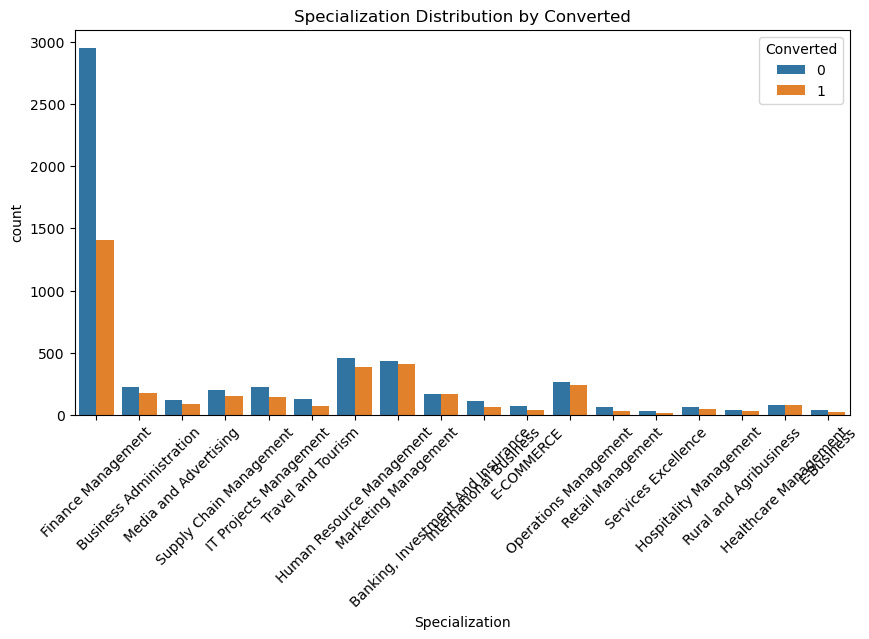


Analysis for Specialization: Countplot displayed



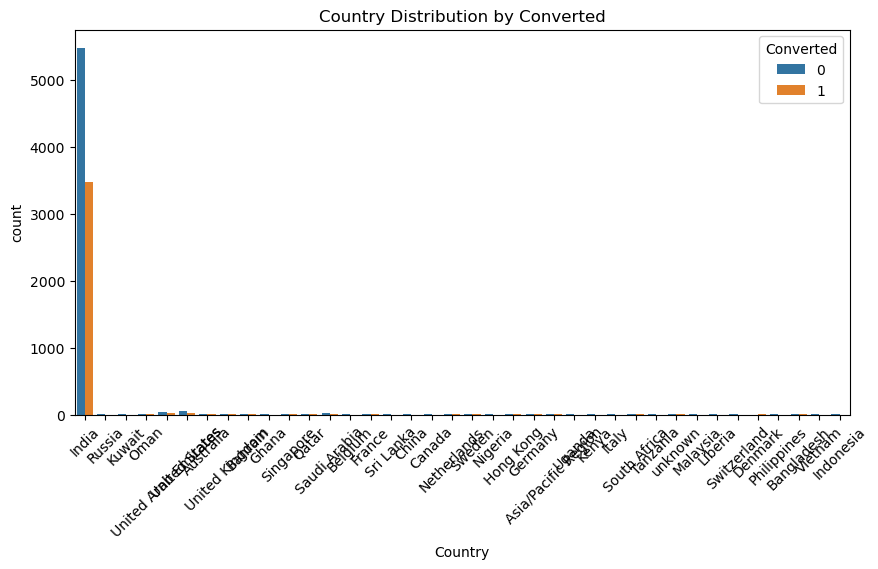


Analysis for Country: Countplot displayed



In [28]:
# 2.4: Analyzing Key Categorical Features
print("\nStep 2.4: Countplots for Categorical Features")
cat_features = ['Lead Source', 'Last Activity', 'Specialization', 'Country']
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Converted', data=df)
    plt.title(f'{feature} Distribution by Converted')
    plt.xticks(rotation=45)
    plt.show()
    print(f"\nAnalysis for {feature}: Countplot displayed\n")

In [ ]:
print("Step 2 Completed: Exploratory Data Analysis Finished")

In [52]:
# Step 3: Feature Engineering
print("\nStep 3: Feature Engineering")


Step 3: Feature Engineering


In [56]:
# 3.1: Drop irrelevant columns (ID columns or redundant columns)
irrelevant_cols = ['Prospect ID', 'Lead Number']
existing_cols = [col for col in irrelevant_cols if col in df.columns]

if existing_cols:
    df.drop(columns=existing_cols, inplace=True)
    print(f"Dropped Irrelevant Columns: {existing_cols}")
else:
    print("Irrelevant Columns already dropped or not found.")



Irrelevant Columns already dropped or not found.


In [44]:
# 3.2: Create dummy variables for categorical features
print("\nCreating Dummy Variables for Categorical Features")
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Dummy Variables Created Successfully")


Creating Dummy Variables for Categorical Features
Dummy Variables Created Successfully


In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
# 3.3: Standardize numerical features
print("\nStandardizing Numerical Features")
scaler = StandardScaler()
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical Features Standardized")


Standardizing Numerical Features
Numerical Features Standardized


In [62]:
print("Final Dataset Shape After Feature Engineering:", df.shape)

Final Dataset Shape After Feature Engineering: (9240, 165)


In [64]:
# Save final dataset
df.to_csv('Leads_Feature_Engineered.csv', index=False)
print("Feature Engineering Completed: Final Dataset Saved as 'Leads_Feature_Engineered.csv'")

Feature Engineering Completed: Final Dataset Saved as 'Leads_Feature_Engineered.csv'


Dropped Irrelevant Columns: Removed Prospect ID and Lead Number as they add no predictive value.

Dummy Variables: Created for categorical features using pd.get_dummies() with drop_first=True to avoid multicollinearity
.
Standardized Numerical Features: Applied scaling to features like TotalVisits and Total Time Spent on Website.

In [66]:
# Step 4: Model Building and Evaluation
print("\nStep 4: Model Building and Evaluation")


Step 4: Model Building and Evaluation


In [68]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [70]:
X = df.drop('Converted', axis=1)
y = df['Converted']


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("Libraries imported successfully!")


Libraries imported successfully!


In [82]:
# 4.1: Split data into training and testing sets
print("Splitting data into training and testing sets")
X = df.loc[:, df.columns != 'Converted']  # Drop 'Converted' safely
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split completed successfully")


Splitting data into training and testing sets
Data split completed successfully


In [84]:
# 4.2: Train Logistic Regression Model
print("\nTraining Logistic Regression Model")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Model training completed")


Training Logistic Regression Model
Model training completed


In [79]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn.metrics import accuracy_score


In [100]:
from sklearn.metrics import accuracy_score
y_true = [0, 1, 1, 0]
y_pred = [0, 1, 1, 1]
print("Accuracy Test:", accuracy_score(y_true, y_pred))


Accuracy Test: 0.75


In [116]:
from sklearn.metrics import classification_report


In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



Evaluating Model Performance
Accuracy: 0.9098

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1695
           1       0.90      0.87      0.88      1077

    accuracy                           0.91      2772
   macro avg       0.91      0.90      0.90      2772
weighted avg       0.91      0.91      0.91      2772



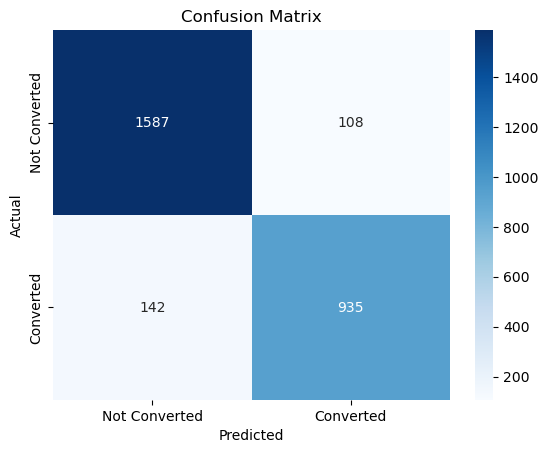

ROC-AUC Score: 0.9652


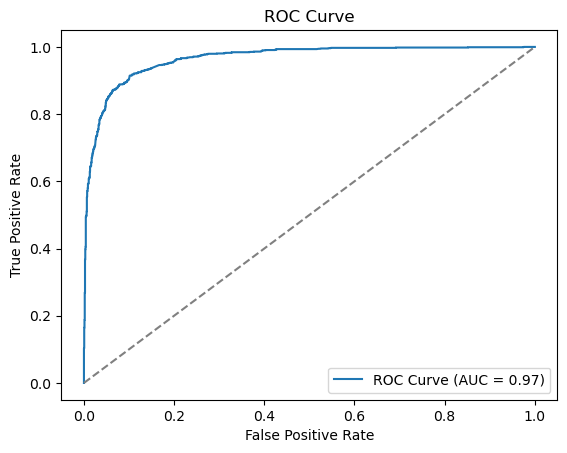

In [120]:
# 4.3: Evaluate Model
print("\nEvaluating Model Performance")
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [78]:
print("Step 4 Completed: Model Built and Evaluated Successfully")

Step 4 Completed: Model Built and Evaluated Successfully


In [122]:
# Step 5: Lead Scoring
print("\nStep 5: Assigning Lead Scores")

# Assign lead scores based on predicted probabilities
X_test['Lead_Score'] = y_pred_proba * 100
X_test['Lead_Score'] = X_test['Lead_Score'].round(2)

# Combine with actual results for analysis
lead_scores = X_test.copy()
lead_scores['Actual_Converted'] = y_test.reset_index(drop=True)
lead_scores['Predicted_Converted'] = y_pred

# Save lead scores to CSV
lead_scores.to_csv('Lead_Scores.csv', index=False)
print("Lead Scoring Completed: Lead scores saved as 'Lead_Scores.csv'")

# Display a sample of the lead scores
print("\nSample Lead Scores:")
print(lead_scores.head())



Step 5: Assigning Lead Scores
Lead Scoring Completed: Lead scores saved as 'Lead_Scores.csv'

Sample Lead Scores:
      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4608     0.946584                    -0.430113              0.145670   
7935    -0.298549                     0.805307             -0.166587   
4043    -0.506071                    -0.886324             -0.632643   
7821    -0.298549                    -0.300549             -0.166587   
856     -0.091027                    -0.523180              0.299469   

      Asymmetrique Activity Score  Asymmetrique Profile Score  \
4608                         14.0                        16.0   
7935                         14.0                        16.0   
4043                         14.0                        16.0   
7821                         14.0                        18.0   
856                          13.0                        18.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead A